In [59]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('dataset/articles2.csv')
dataset

,jid,aid,date,title,desc
0,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,ASSESSMENT OF COMPUTATIONAL THINKING: SEBUAH K...,The main objective of this study was to conduc...
1,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,EXPLORING THE DIGITAL LEARNING MATERIALS NEEDS...,This research aimed to explore the need for di...
2,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,KAJIAN LITERATUR SISTEMATIS TENTANG UPAYA MENI...,Computational thinking (CT) has gained attenti...
3,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MANAJEMEN EVALUASI PENDIDIKAN BERBASIS TEKNOLO...,Education is a determinant of the progress of ...
4,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MELALUI METODE DISKUSI DENGAN MEDIA GAMBAR SER...,The purpose of this study was to determine the...
...,...,...,...,...,...
2616615,9999,oai:ojs.unhas:article/25258,2023-10-11,Potential of Limestone as a Groundwater Reserv...,"The research area is in Tintingon Village, Ban..."
2616616,9999,oai:ojs.unhas:article/25371,2023-11-02,Middle Eocene Nannofossil Assemblages Respondi...,The Kei Besar Island is mainly composed of the...
2616617,9999,oai:ojs.unhas:article/25377,KOSONG,KOSONG,KOSONG
2616618,9999,oai:ojs.unhas:article/25476,2023-11-02,Assessment of Landslide Susceptibility Microzo...,"Based on the geological condition, the researc..."


In [9]:
dataset.query("desc == 'KOSONG' or title == 'KOSONG'")

,jid,aid,date,title,desc
18,10004,oai:ojs2.profood.unram.ac.id:article/6,KOSONG,KOSONG,KOSONG
19,10004,oai:ojs2.profood.unram.ac.id:article/7,KOSONG,KOSONG,KOSONG
20,10004,oai:ojs2.profood.unram.ac.id:article/10,KOSONG,KOSONG,KOSONG
49,10004,oai:ojs2.profood.unram.ac.id:article/44,KOSONG,KOSONG,KOSONG
50,10004,oai:ojs2.profood.unram.ac.id:article/46,KOSONG,KOSONG,KOSONG
...,...,...,...,...,...
2616498,9999,oai:ojs.10.0.1.236:article/1742,KOSONG,KOSONG,KOSONG
2616612,9999,oai:ojs.unhas:article/23930,KOSONG,KOSONG,KOSONG
2616614,9999,oai:ojs.unhas:article/24638,KOSONG,KOSONG,KOSONG
2616617,9999,oai:ojs.unhas:article/25377,KOSONG,KOSONG,KOSONG


In [54]:
data = dataset[dataset.title != 'KOSONG']
data = data[data.desc != 'KOSONG']
data.dropna(inplace=True)
data = data.reset_index(drop=True)
data

,jid,aid,date,title,desc
0,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,ASSESSMENT OF COMPUTATIONAL THINKING: SEBUAH K...,The main objective of this study was to conduc...
1,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,EXPLORING THE DIGITAL LEARNING MATERIALS NEEDS...,This research aimed to explore the need for di...
2,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,KAJIAN LITERATUR SISTEMATIS TENTANG UPAYA MENI...,Computational thinking (CT) has gained attenti...
3,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MANAJEMEN EVALUASI PENDIDIKAN BERBASIS TEKNOLO...,Education is a determinant of the progress of ...
4,10003,oai:ojs2.dev.ejurnal.stkip-pessel.ac.id/:artic...,2023-08-30,MELALUI METODE DISKUSI DENGAN MEDIA GAMBAR SER...,The purpose of this study was to determine the...
...,...,...,...,...,...
945151,9999,oai:ojs.unhas:article/23889,2023-02-14,Susceptibility of the Surrounding Soil and Roc...,"The research area is located in Banga, Soppeng..."
945152,9999,oai:ojs.unhas:article/23930,2023-10-31,Presentation of Green Open Space of Makassar C...,"Green open space has three basic functions, am..."
945153,9999,oai:ojs.unhas:article/25258,2023-10-11,Potential of Limestone as a Groundwater Reserv...,"The research area is in Tintingon Village, Ban..."
945154,9999,oai:ojs.unhas:article/25371,2023-11-02,Middle Eocene Nannofossil Assemblages Respondi...,The Kei Besar Island is mainly composed of the...


In [55]:
data[data.desc == 'KOSONG'], data[data.title == 'KOSONG']

(Empty DataFrame
 Columns: [jid, aid, date, title, desc]
 Index: [],
 Empty DataFrame
 Columns: [jid, aid, date, title, desc]
 Index: [])

In [56]:
data[data.desc.isna()]

,jid,aid,date,title,desc


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945156 entries, 0 to 945155
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   jid     945156 non-null  int64 
 1   aid     945156 non-null  object
 2   date    945156 non-null  object
 3   title   945156 non-null  object
 4   desc    945156 non-null  object
dtypes: int64(1), object(4)
memory usage: 36.1+ MB


In [58]:
word_count = data.desc.apply(lambda x : len(x.split()))
word_count

0         117
1         212
2         203
3         147
4         179
         ... 
945151    202
945152    252
945153    160
945154    222
945155    216
Name: desc, Length: 945156, dtype: int64

(array([9.44259e+05, 6.78000e+02, 1.31000e+02, 4.60000e+01, 1.20000e+01,
        1.60000e+01, 5.00000e+00, 5.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([1.0000e+00, 1.0967e+03, 2.1924e+03, 3.2881e+03, 4.3838e+03,
        5.4795e+03, 6.5752e+03, 7.6709e+03, 8.7666e+03, 9.8623e+03,
        1.0958e+04]),
 <BarContainer object of 10 artists>)

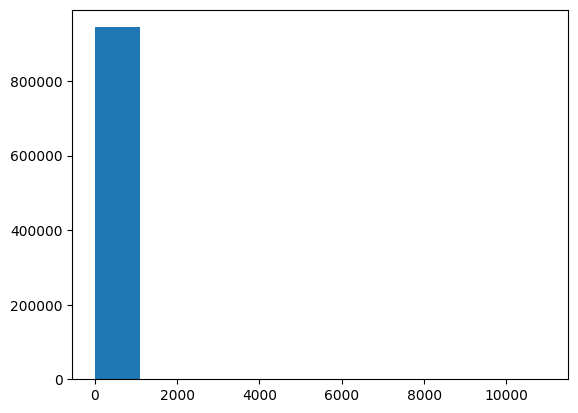

In [60]:
plt.hist(word_count)

In [62]:
max(data.word_count), min(data.word_count)

(10958, 1)

In [61]:
data['word_count'] = word_count
data[data.word_count > 2000]

,jid,aid,date,title,desc,word_count
8181,1015,oai:ojs.ejournal.unsrat.ac.id:article/10195,2015-11-09,ANGKA KEJADIAN STOMATITIS YANG DIDUGA SEBAGAI ...,ANGKA KEJADIAN STOMATITIS YANG DIDUGA SEBAGAI ...,3703
8182,1015,oai:ojs.ejournal.unsrat.ac.id:article/10196,2015-11-09,HUBUNGAN KEBIASAAN MENYIKAT GIGI DAN STATUS KE...,HUBUNGAN KEBIASAAN MENYIKAT GIGI DAN STATUS KE...,2984
10714,10186,oai:ojs.jurnal.unissula.ac.id:article/1119,2017-05-23,CRIMES AGAINST CHILDREN AS ACTORS,"The word ""mandate"" is quite broad sense, but d...",2447
21676,10356,oai:ojs.pkp.sfu.ca:article/10,2012-08-06,The Correlated Factors of Mandatory Social Rep...,Objective – Islamic Banking is closely related...,2177
48433,11055,oai:ojs.journal.um-surabaya.ac.id:article/3422,2020-01-21,Studi Analisis Frekuensi Santri Pondok Pesantr...,PENDAHULUANSejak zaman Rosulullah SAW sampai s...,2366
...,...,...,...,...,...,...
905866,8746,oai:jurnalunj.journal.unj.ac.id:article/34854,2023-04-30,The Impact of Father Involvement in the Early ...,Father's involvement is something that influen...,2120
905875,8746,oai:jurnalunj.journal.unj.ac.id:article/39028,2023-11-30,Parenting Skills as The Closest Teacher to Ear...,Parents play an important role in the developm...,2760
905877,8746,oai:jurnalunj.journal.unj.ac.id:article/39655,2023-11-30,"Smartphone Addiction, Executive Function, and ...",Early childhood emotional dysregulation is cri...,3509
943686,9969,oai:ojs.publikasi.mercubuana.ac.id:article/22519,2024-02-29,Strategi Komunikasi BPP (Balai Penyuluhan Pert...,Strategi Komunikasi BPP (Balai Penyuluhan Pert...,2770


In [65]:
data.iloc[8181].desc

'ANGKA KEJADIAN STOMATITIS YANG DIDUGA SEBAGAI DENTURE STOMATITIS PADA PENGGUNA GIGI TIRUAN DI KELURAHAN BATU KOTA MANADO   Lingkan Lahama1), Vonny N.S Wowor1), Olivia Amelia Waworuntu2) 1) Program Studi Pendidikan DokterÂ\xa0 Gigi Fakultas Kedokteran  2Bagian Mikrobiologi Fakultas Kedokteran   ABSTRACT A long and continuous usage of denture and the ignorance of oral hygiene can cause inflammation to mucosa tissues under the denture. One of the damages that can happen is denture stomatitis. Denture stomatitis is an inflammatory on the mouth mucosa caused by the usage of denture. This is a kind of descriptive study with cross-sectional design, which the population are 81 samples of Batu Kota society who are using denture. The data is gained by interview and by filling the examination form. The way of taking sample is by puposive sampling method. The result of this study shows a high Percentage that is 83.95% respondents who are expected have denture stomatitis, which 40.74% respondents 

In [26]:
def bersihkan_abstrak(teks):
    teks = teks.lower()
    # Membagi teks berdasarkan kata "ABSTRAK"
    bagian_abstrak = re.split(r'abstrak|abstract', teks)[-1].strip()

    # Membagi teks hasil pemisahan dengan menggunakan '\n' untuk mendapatkan baris-baris yang terpisah
    baris = re.split(r'\n|\.\s|\.', bagian_abstrak)

    # Menghapus baris yang mengandung kata kunci "Kata kunci" atau "kata kunci:"
    baris_bersih = [line for line in baris if not line.startswith('kata kunci')]

    # Menggabungkan baris-baris yang tersisa kembali menjadi teks yang bersih
    abstrak_bersih = ' '.join(baris_bersih).strip()

    # Menghapus tag nbsp pada text
    abstrak_bersih = abstrak_bersih.replace("&nbsp;", '')

    # Menghapus simbol spesial yang ada pada text
    abstrak_bersih = abstrak_bersih.translate(str.maketrans('', '', 'å¼«¥ª°©ð±§µæ¹¢³¿β®äâ£'))

    # Hanya mengambil huruf alphanumeric
    abstrak_bersih = re.sub(r'[^ \w+]', '', abstrak_bersih)

    posisi_kata_kunci = abstrak_bersih.find('kata kunci')
    
    # Jika kata kunci ditemukan, maka teks setelahnya akan dihapus
    if posisi_kata_kunci != -1:
        abstrak_bersih = abstrak_bersih[:posisi_kata_kunci]

    return abstrak_bersih

In [66]:
desc = data.iloc[8181].desc
desc, bersihkan_abstrak(desc)

('ANGKA KEJADIAN STOMATITIS YANG DIDUGA SEBAGAI DENTURE STOMATITIS PADA PENGGUNA GIGI TIRUAN DI KELURAHAN BATU KOTA MANADO   Lingkan Lahama1), Vonny N.S Wowor1), Olivia Amelia Waworuntu2) 1) Program Studi Pendidikan DokterÂ\xa0 Gigi Fakultas Kedokteran  2Bagian Mikrobiologi Fakultas Kedokteran   ABSTRACT A long and continuous usage of denture and the ignorance of oral hygiene can cause inflammation to mucosa tissues under the denture. One of the damages that can happen is denture stomatitis. Denture stomatitis is an inflammatory on the mouth mucosa caused by the usage of denture. This is a kind of descriptive study with cross-sectional design, which the population are 81 samples of Batu Kota society who are using denture. The data is gained by interview and by filling the examination form. The way of taking sample is by puposive sampling method. The result of this study shows a high Percentage that is 83.95% respondents who are expected have denture stomatitis, which 40.74% respondents